# Nomes

* Alícia Marzola Chaves
* Arthur Pereira Carvalho

# Base e Bibliotecas

In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [35]:
pd.set_option('display.max_colwidth', None, 'display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [36]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [37]:
df = pd.read_csv('twitterdata.csv')
df.head(5)

,keyword,likes,tweets
0,COVID-19,1,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.
1,COVID-19,0,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic."
2,COVID-19,0,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not
3,COVID-19,1,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night."
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP


# Data Understanding & Visualization

In [38]:
print(f"O Dataset contém {df.shape[1]} colunas e {df.shape[0]} samples.")

O Dataset contém 3 colunas e 128837 samples.


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128837 entries, 0 to 128836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  128837 non-null  object
 1   likes    128837 non-null  int64 
 2   tweets   128837 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [40]:
# Valores Faltantes
df.isna().sum()

keyword    0
likes      0
tweets     0
dtype: int64

Análise de Quantidade de Caracteres por Tweet

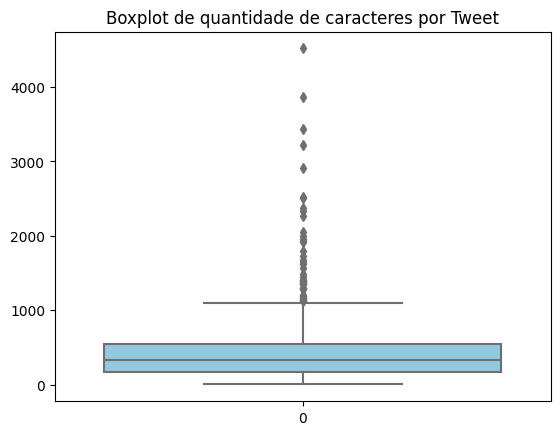

In [41]:
# Cria coluna de tamanho da string
df['len'] = df['tweets'].str.len()

# Agrupa por tamanho
tamanho = df.groupby('len').size()
sns.boxplot(tamanho.index, color='skyblue')
plt.title("Boxplot de quantidade de caracteres por Tweet")
plt.show()

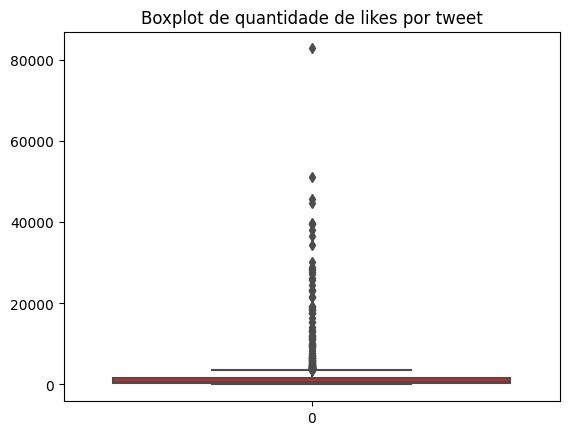

In [42]:
# Agrupa por likes
likes = df.groupby('likes').size()
sns.boxplot(likes.index, color='red')
plt.title("Boxplot de quantidade de likes por tweet")
plt.show()

In [43]:
df_max = df.loc[df['tweets'].str.len()>280]
print(f"{len(df_max)} tweets ultrapassam o limite de 280 carcateres.")

1504 tweets ultrapassam o limite de 280 carcateres.


Remoção de outliers

In [44]:
tweets_longos = df_max['tweets'].to_list()
df_filtrada = df.loc[~df['tweets'].isin(tweets_longos)]
df_filtrada['len'].max()

280

Análise de Caracteres e Palavras por Tweet

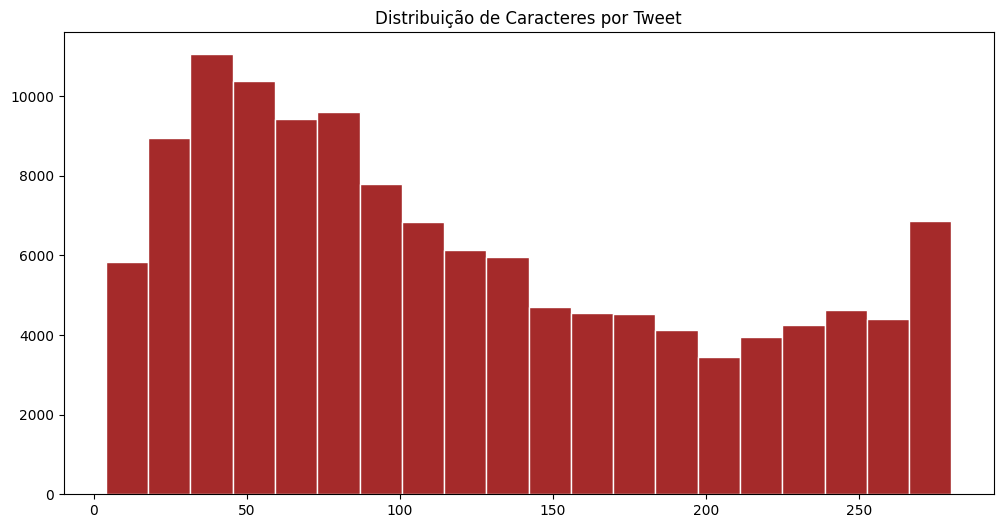

In [45]:
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['len'], color='brown', bins=20, edgecolor='white')
plt.title("Distribuição de Caracteres por Tweet")
plt.show()

/tmp/ipykernel_799841/3241805324.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



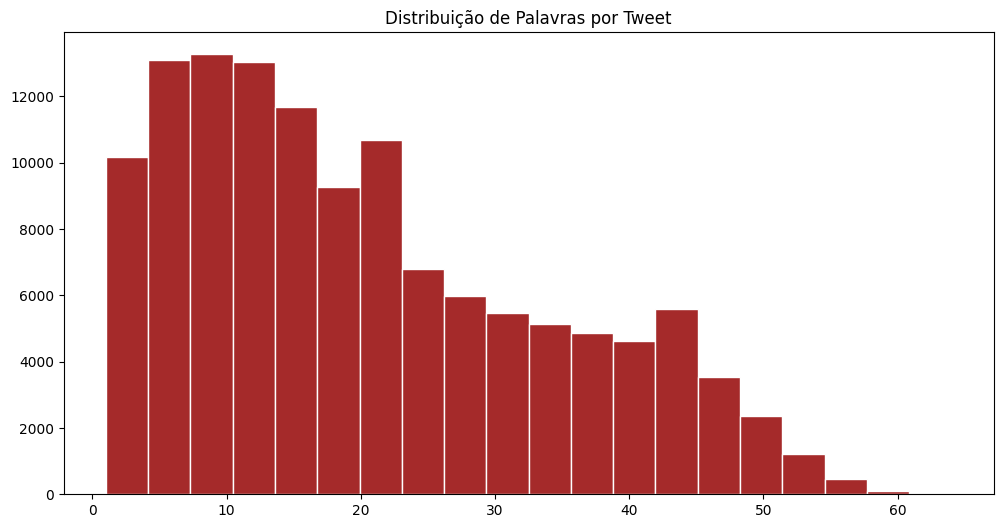

In [46]:
df_filtrada.loc[:, 'words'] = df_filtrada['tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['words'], bins=20, edgecolor='white', color='brown')
plt.title('Distribuição de Palavras por Tweet')
plt.show()

Frequência de Palavras

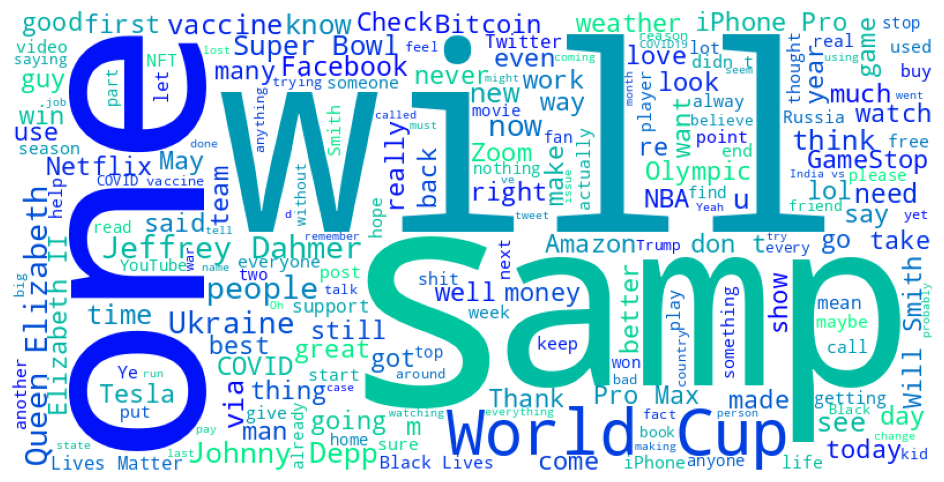

In [47]:
from wordcloud import WordCloud

text = ' '.join(df['tweets'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Análise de Palavras Chave

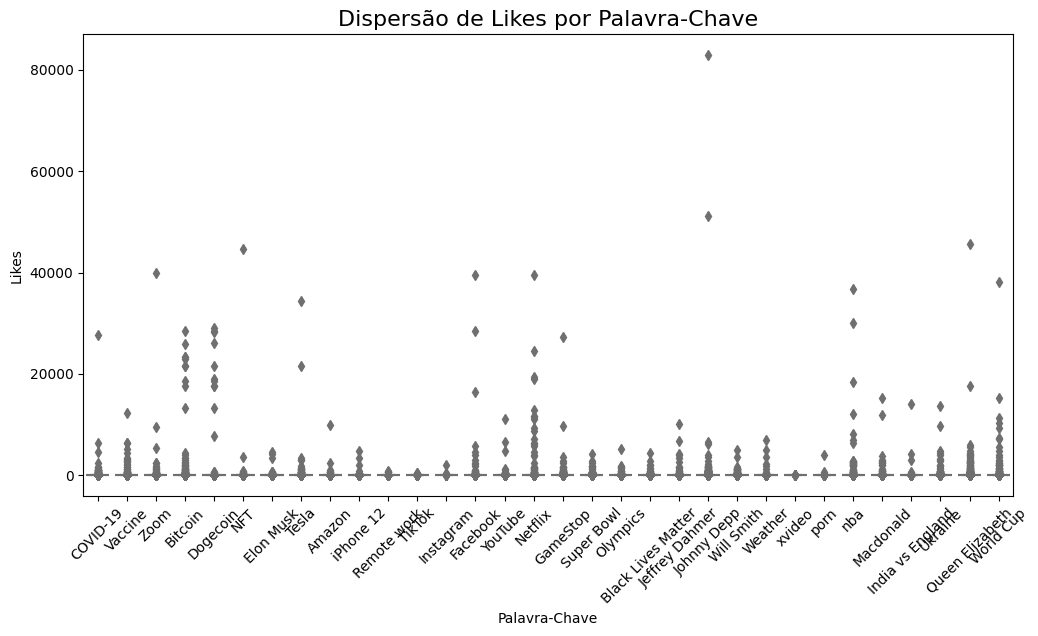

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='keyword', y='likes', palette='pastel')
plt.title('Dispersão de Likes por Palavra-Chave', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Palavra-Chave')
plt.ylabel('Likes')
plt.show()

In [49]:
keywords = df.groupby('keyword').size().sort_values(ascending=False)
print(f"Palavras-chave mais encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave mais encontradas no dataset:
keyword
Amazon                5001
Bitcoin               5001
Black Lives Matter    5001
COVID-19              5001
Elon Musk             5001
dtype: int64


In [50]:
keywords = df.groupby('keyword').size().sort_values(ascending=True)
print(f"Palavras-chave menos encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave menos encontradas no dataset:
keyword
xvideo         109
Instagram      124
porn           213
Remote work    678
TikTok         687
dtype: int64


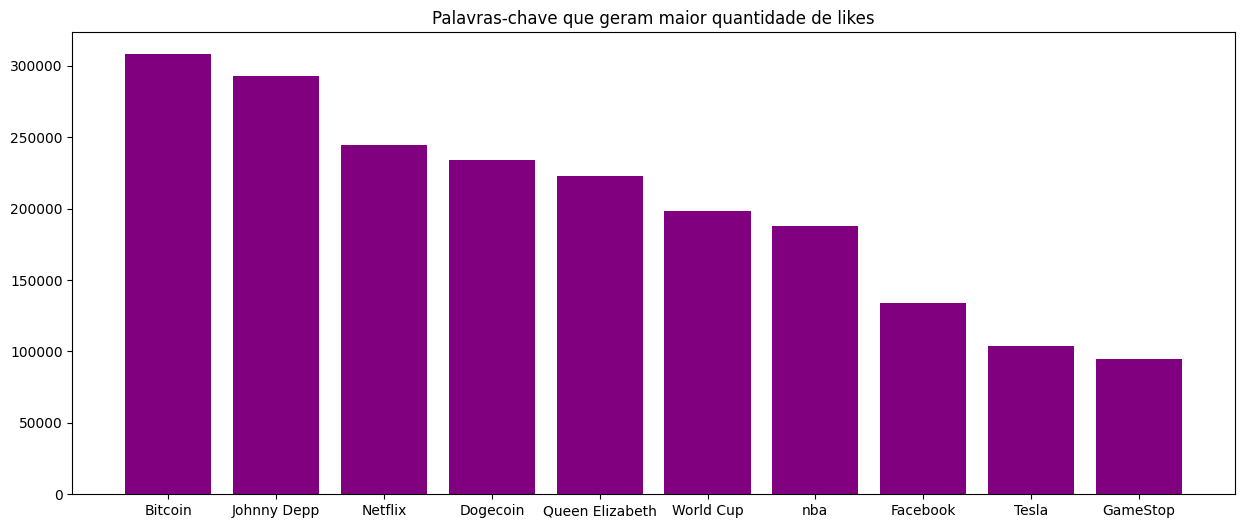

In [51]:
keywords = df_filtrada.groupby('keyword').size()
categories = keywords.index.to_list()

df_categories = df_filtrada.loc[df_filtrada['keyword'].isin(categories)]
likes_per_category = df_categories.groupby('keyword')['likes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(likes_per_category.index, likes_per_category.values, color='purple')
plt.title('Palavras-chave que geram maior quantidade de likes')
plt.show()

Análise de Curtidas

In [52]:
# Medidas Estatísticas
df_filtrada['likes'].describe()

count    127333.000000
mean         23.383412
std         585.593796
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       82843.000000
Name: likes, dtype: float64

In [53]:
likes = df_filtrada.groupby('likes').size()
likes.head(15)

likes
0     65018
1     24139
2     10379
3      5631
4      3519
5      2461
6      1779
7      1324
8      1065
9       903
10      705
11      631
12      555
13      429
14      439
dtype: int64

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



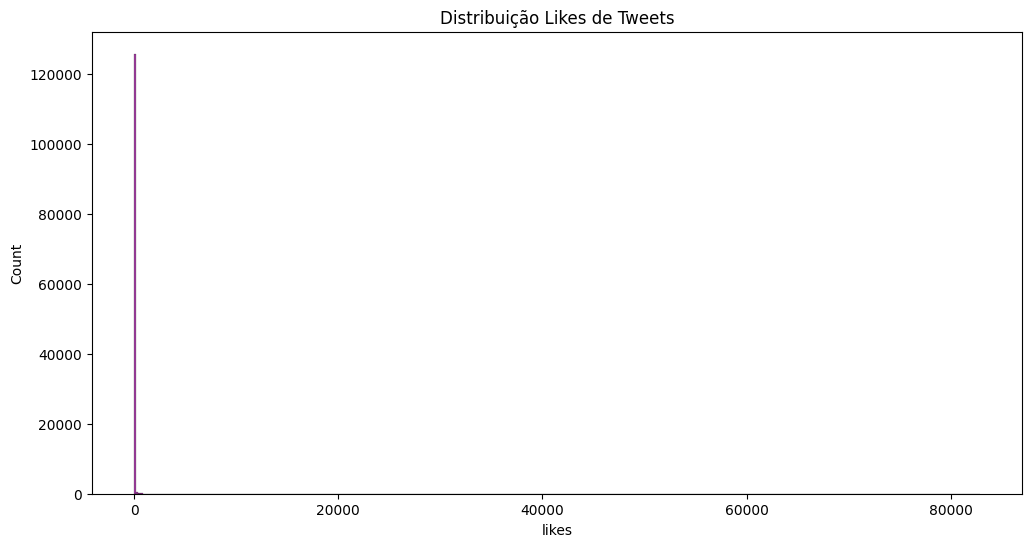

In [54]:
# Distribuição de Likes
plt.figure(figsize=(12,6))
sns.histplot(df_filtrada['likes'], color='purple', bins=500)
plt.title("Distribuição Likes de Tweets")
plt.show()

Divisão de tweets em populares (+1000 curtidas) e não populares para facilitar visualização

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



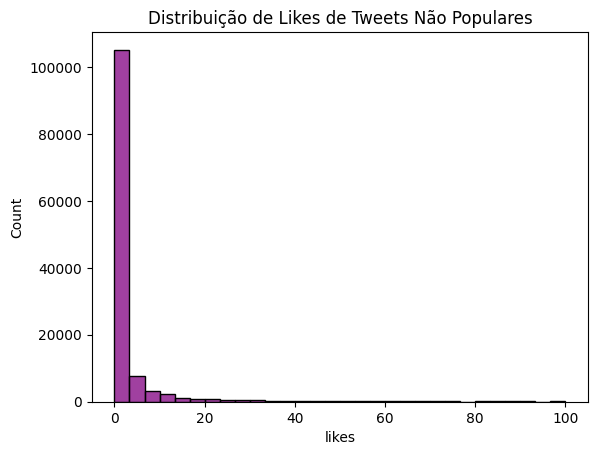

In [55]:
likes100 = df_filtrada.loc[df_filtrada['likes']<=100]
sns.histplot(likes100['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Não Populares")
plt.show()

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Há 335 tweets com mais de 1000 likes.


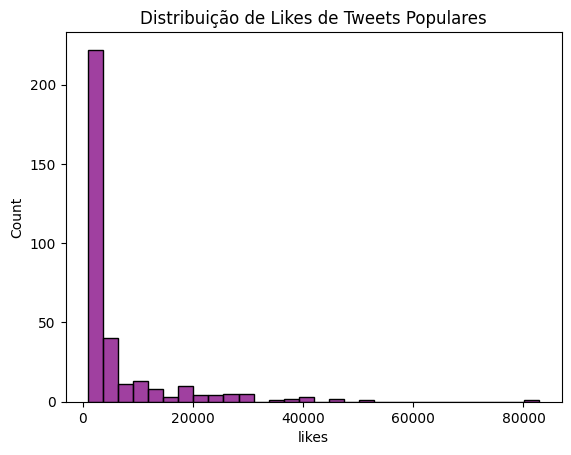

In [56]:
likes1000 = df_filtrada.loc[df_filtrada['likes']>=1000]
print(f"Há {len(likes1000)} tweets com mais de 1000 likes.")
sns.histplot(likes1000['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Populares")
plt.show()

# Regressão Logística

## Pré-Processamento

Análise de Caracteres Especiais

In [57]:
df_filtrada.loc[:, 'emojis'] = df_filtrada['tweets'].str.contains(r'[\u263a-\U0001f645]', na=False)
df_filtrada.loc[:, 'hashtags'] = df_filtrada['tweets'].str.contains('#', na=False)
df_filtrada.loc[:, 'questions'] = df_filtrada['tweets'].str.contains(r'\?', na=False)

url_pattern = r"(?i)\b(?:https?://|ftp://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4})(:\d+)?(/[^\s]*)?"
df_filtrada.loc[:, 'urls'] = df_filtrada['tweets'].str.contains(url_pattern, na=False, regex=True)

/tmp/ipykernel_799841/3956776048.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_799841/3956776048.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_799841/3956776048.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykerne

Análise de Sentimento

In [62]:
from transformers import pipeline

classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

def classify_emotions(text):
    results = classifier(text)[0]  
    return {res['label']: res['score'] for res in results}

df_emotions = df_filtrada["tweets"].apply(classify_emotions).apply(pd.Series)

df_final = pd.concat([df_filtrada, df_emotions], axis=1)

df_final.head()

Device set to use cpu
/home/alicia/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



,keyword,likes,tweets,len,words,emojis,hashtags,questions,urls,sentiment,extremely_negative,anger,disgust,fear,joy,neutral,sadness,surprise
0,COVID-19,1,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.,160,25,False,False,False,False,0.233333,False,0.014132,0.013503,0.074907,0.009247,0.193328,0.669441,0.025442
1,COVID-19,0,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic.",159,25,False,False,False,False,0.000000,False,0.018491,0.014783,0.003856,0.080516,0.665869,0.179119,0.037365
2,COVID-19,0,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not,97,18,False,False,False,False,0.000000,False,0.017228,0.082486,0.011172,0.006944,0.847772,0.019747,0.014652
3,COVID-19,1,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night.",222,38,False,False,False,False,0.357143,False,0.017196,0.035473,0.813779,0.004935,0.085307,0.036781,0.006529
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP,76,12,False,False,False,False,0.500000,False,0.007630,0.008323,0.005177,0.008970,0.921229,0.003522,0.045148


In [63]:
df_final.to_csv('df_final.csv')

## Correlação de Spearman

In [69]:
df_final.columns

Index(['keyword', 'likes', 'tweets', 'len', 'words', 'emojis', 'hashtags',
       'questions', 'urls', 'sentiment', 'extremely_negative', 'anger',
       'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise', 'popular'],
      dtype='object')

In [72]:
from scipy.stats import spearmanr

df_final.loc[:, 'popular'] = df_final['likes']>=5

df_corr = df_final[['len', 'words', 'emojis', 'hashtags',
       'questions', 'urls', 'anger', 'disgust', 'fear', 'joy', 'neutral',
        'sadness', 'surprise', 'popular']]


In [73]:
correlation, p_value = spearmanr(df_corr['popular'], df_corr['hashtags'])
print(f"Spearman correlation: {correlation}, P-value: {p_value}")

spearman_corr_matrix = df_corr.corr(method='spearman')
print(spearman_corr_matrix['popular'])

Spearman correlation: 0.0672641678819577, P-value: 1.3723136177752133e-127
len          0.097665
words        0.094541
emojis       0.071802
hashtags     0.067264
questions   -0.013863
urls         0.033238
anger        0.002202
disgust     -0.053537
fear         0.032287
joy          0.053195
neutral     -0.064520
sadness     -0.025271
surprise    -0.027568
popular      1.000000
Name: popular, dtype: float64


## Modelo

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

X = df_corr.drop('popular', axis=1)
y = df_corr['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

/home/alicia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [102]:
y_probs = model.predict_proba(X_test)[:, 1] 

threshold = 0.7
y_pred_adjusted = (y_probs >= threshold).astype(int)

print(f"Ajuste de limiar: {threshold}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_adjusted))

precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_probs)

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC: {auc}')

Ajuste de limiar: 0.7
Matriz de Confusão:
[[32136   467]
 [ 5368   229]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     32603
        True       0.33      0.04      0.07      5597

    accuracy                           0.85     38200
   macro avg       0.59      0.51      0.49     38200
weighted avg       0.78      0.85      0.79     38200

Precisão: 0.33
Recall: 0.04
F1-Score: 0.07
AUC: 0.6091048667624428


### Odds Ratio

In [76]:
# Coletando os coeficientes do modelo
coefficients = model.coef_[0]

# Calculando o odds ratio (exponenciando os coeficientes)
odds_ratios = np.exp(coefficients)

# Criando um DataFrame para exibir os odds ratios com os nomes das variáveis
odds_ratios_df = pd.DataFrame({
    'Variável': [f'Feature {i+1}' for i in range(X_train_resampled.shape[1])],
    'Coeficiente': coefficients,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

      Variável  Coeficiente  Odds Ratio
0    Feature 1     0.000833    1.000833
1    Feature 2     0.013255    1.013343
2    Feature 3     0.387806    1.473744
3    Feature 4     0.283449    1.327701
4    Feature 5    -0.102156    0.902888
5    Feature 6     0.178329    1.195218
6    Feature 7    -0.188730    0.828010
7    Feature 8    -0.003027    0.996978
8    Feature 9    -0.166518    0.846608
9   Feature 10     0.434573    1.544303
10  Feature 11    -0.233013    0.792143
11  Feature 12    -0.143596    0.866238
12  Feature 13    -0.135599    0.873193


In [77]:
df_corr.columns

Index(['len', 'words', 'emojis', 'hashtags', 'questions', 'urls', 'anger',
       'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise', 'popular'],
      dtype='object')

# Regressão Logística por Categoria

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

f_final = df_final[['keyword', 'len', 'words', 'emojis', 'hashtags',
       'questions', 'urls', 'anger', 'disgust', 'fear', 'joy',
        'neutral', 'sadness', 'surprise', 'popular']]

results = []

for keyword in df_final['keyword'].unique():
    df_keyword = df_final.loc[df_final['keyword']==keyword]

    X = df_keyword.drop(['keyword', 'popular'], axis=1)
    y = df_keyword['popular']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ros = RandomOverSampler()
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    model = LogisticRegression()
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    y_pred = (y_proba >= 0.7).astype(int)

    metrics = {
        'keyword': keyword,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_pred, zero_division=0),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }

    results.append(metrics)

results_df = pd.DataFrame(results)
results_df.head(32)

/home/alicia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/alicia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/alicia/.local/lib/python

,keyword,accuracy,precision,recall,f1_score,roc_auc
0,COVID-19,0.838908,0.250000,0.031532,0.056000,0.600226
1,Vaccine,0.854795,0.375000,0.014286,0.027523,0.541872
2,Zoom,0.814990,0.254098,0.144860,0.184524,0.626871
3,Bitcoin,0.826116,0.382716,0.130252,0.194357,0.647096
4,Dogecoin,0.851485,0.100000,0.083333,0.090909,0.577295
5,NFT,0.765457,0.477612,0.092486,0.154964,0.655491
6,Elon Musk,0.898042,0.118280,0.137500,0.127168,0.569883
7,Tesla,0.860244,0.250000,0.025510,0.046296,0.550246
8,Amazon,0.893432,0.100000,0.022222,0.036364,0.565146
9,iPhone 12,0.832776,0.179487,0.280000,0.218750,0.597650


In [98]:
results_df['accuracy'].mean()

0.8354994374508611

In [99]:
results_df['roc_auc'].mean()

0.5864438410533303

In [100]:
results_df['accuracy'].max()

0.9393939393939394